In [1]:
from scipy.optimize import linprog

# Example 1
Let’s first solve the linear programming problem from above:
$$\begin{matrix} \text{maximize} & z=x+2y \\
\text{subject to} & 2x+y\leq 20 \\
& -4x+5y \leq 10 \\
& -x+2y \geq -2 \\
& -x+5y = 15 \\
& x,\ y \geq 0 \end{matrix}$$

**linprog()** solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization:
<ul>
<li>
Instead of maximizing $z = x + 2y$, you can minimize its negative $(−z = −x − 2y)$.
</li>
<li>
Instead of having the greater than or equal to sign, you can multiply the yellow inequality by −1 and get the opposite less than or equal to sign ($\leq$).
</li>
</ul>

After introducing these changes, you get a new system:
$$\begin{matrix} \text{maximize} & -z=-x-2y \\
\text{subject to} & 2x+y\leq 20 \\
& -4x+5y \leq 10 \\
& x-2y \leq 2 \\
& -x+5y = 15 \\
& x,\ y \geq 0 \end{matrix}$$

This system is equivalent to the original and will have the same solution. The only reason to apply these changes is to overcome the limitations of SciPy related to the problem formulation.

The next step is to define the input values:

In [2]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x
lhs_ineq = [[ 2,  1],  # Red constraint left side
             [-4,  5],  # Blue constraint left side
             [ 1, -2]]  # Yellow constraint left side
rhs_ineq = [20,  # Red constraint right side
             10,  # Blue constraint right side
              2]  # Yellow constraint right side
lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

You put the values from the system above into the appropriate lists, tuples, or NumPy arrays:
<ul>
<li>
obj holds the coefficients from the objective function.
</li>
<li>
lhs_ineq holds the left-side coefficients from the inequality (red, blue, and yellow) constraints.
</li>
<li>
rhs_ineq holds the right-side coefficients from the inequality (red, blue, and yellow) constraints.
</li>
<li>
lhs_eq holds the left-side coefficients from the equality (green) constraint.
</li>
<li>
rhs_eq holds the right-side coefficients from the equality (green) constraint.
</li>
</ul>

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [3]:
bnd = [(0, float("inf")),  # Bounds of x
        (0, float("inf"))]  # Bounds of y

This statement is redundant because linprog() takes these bounds (zero to positive infinity) by default.

**Note:** Instead of float("inf"), you can use math.inf, numpy.inf, or scipy.inf.

Finally, it’s time to optimize and solve your problem of interest. You can do that with **linprog()**:

In [4]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
               method="revised simplex")

In [5]:
opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

The parameter c refers to the coefficients from the objective function. **A_ub** and **b_ub** are related to the coefficients from the left and right sides of the inequality constraints, respectively. Similarly, **A_eq** and **b_eq** refer to equality constraints. You can use bounds to provide the lower and upper bounds on the decision variables.

You can use the parameter method to define the linear programming method that you want to use. There are three options:

<ol>
<li> method="interior-point" selects the interior-point method. This option is set by default. </li>
<li>method="revised simplex" selects the revised two-phase simplex method.</li>
<li>method="simplex" selects the legacy two-phase simplex method.</li>
</ol>

You can access these values separately:

In [6]:
opt.fun

-16.818181818181817

In [7]:
opt.success

True

In [8]:
opt.x

array([7.72727273, 4.54545455])

That’s how you get the results of optimization. You can also show them graphically:

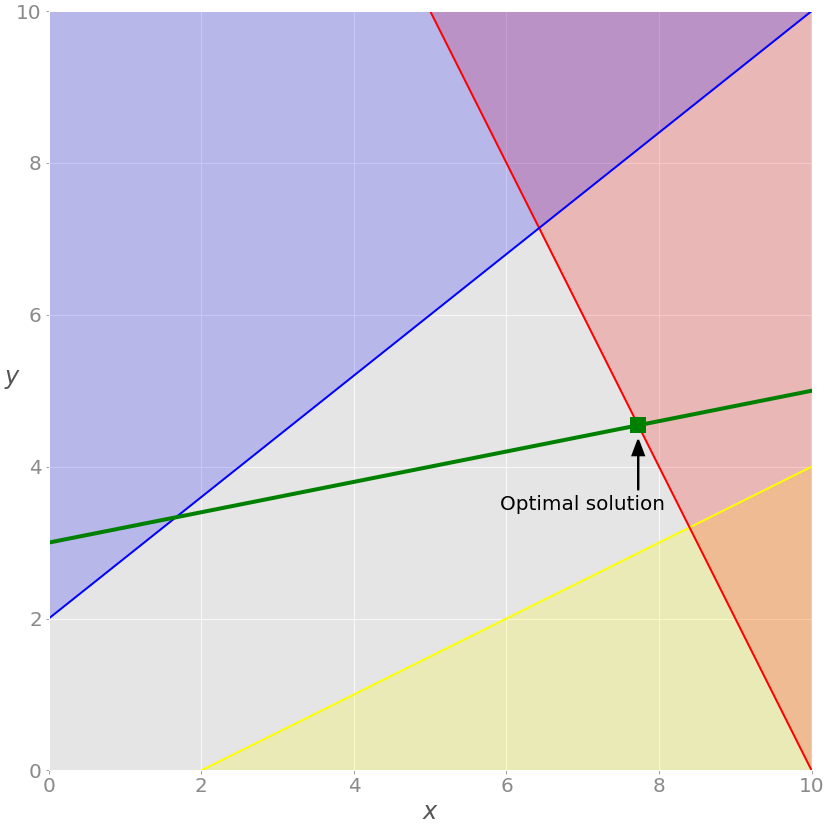

As discussed earlier, the optimal solutions to linear programming problems lie at the vertices of the feasible regions. In this case, the feasible region is just the portion of the green line between the blue and red lines. The optimal solution is the green square that represents the point of intersection between the green and red lines.

If you want to exclude the equality (green) constraint, just drop the parameters **A_eq** and **b_eq** from the **linprog()** call:

In [10]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,
               method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -20.714285714285715
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.        , 0.        , 9.85714286])
  status: 0
 success: True
       x: array([6.42857143, 7.14285714])

The solution is different from the previous case. You can see it on the chart:

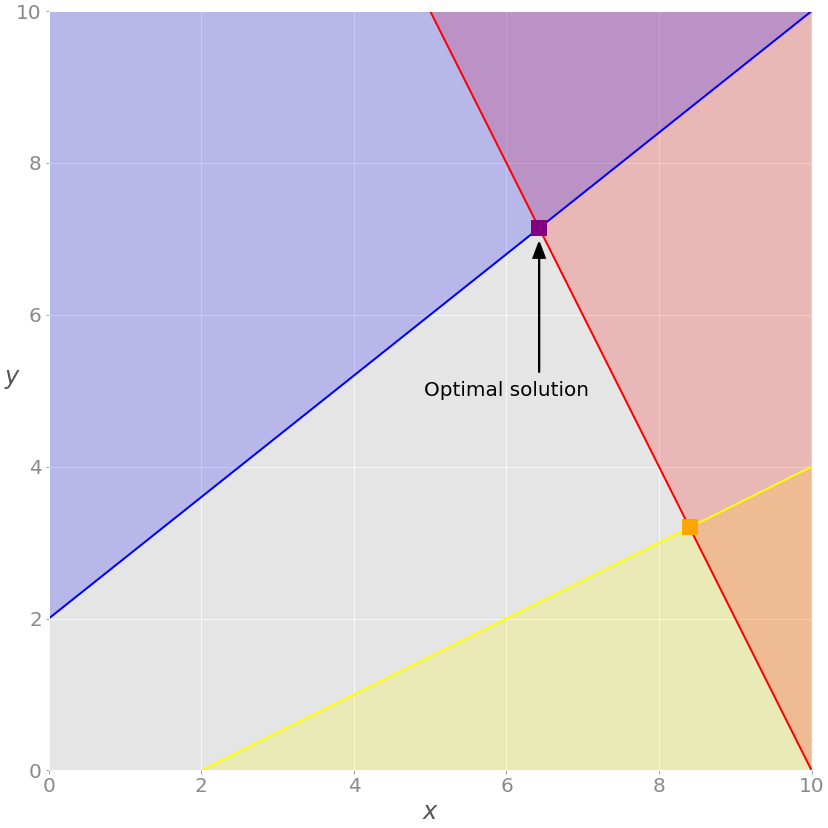

In this example, the optimal solution is the purple vertex of the feasible (gray) region where the red and blue constraints intersect. Other vertices, like the yellow one, have higher values for the objective function.

# Example 2
You can use SciPy to solve the resource allocation problem stated in the earlier section:

$$\begin{matrix} \text{maximize} & 20x_1+12x_2+4-x_3+25x_4 \\
\text{subject to} & x_1+x_2+x_3 \leq 50 \\
& 3x_1+2x_2+x_3 \leq 100 \\
& x_2+2x_3 +3x_4 \leq 90 \\
& x_1,\ x_2,\ x_3,\ x_4 \geq 0 \end{matrix}$$

As in the previous example, you need to extract the necessary vectors and matrix from the problem above, pass them as the arguments to **.linprog()**, and get the results:

In [11]:
obj = [-20, -12, -40, -25]
lhs_ineq = [[1, 1, 1, 1],  
             [3, 2, 1, 0],  
             [0, 1, 2, 3]]  
rhs_ineq = [ 50,  
             100,  
              90]  
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

The result tells you that the maximal profit is 1900 and corresponds to $x_1 = 5$ and $x_3 = 45$. It’s not profitable to produce the second and fourth values under the given conditions.